<a href="https://colab.research.google.com/github/brunoclvrt/Case-2---BNB-price-prediction/blob/main/BNB_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**

Launched in July 2017, Binance is the biggest cryptocurrency exchange globally based on daily trading volume. Binance aims to bring cryptocurrency exchanges to the forefront of financial activity globally. The idea behind Binance’s name is to show this new paradigm in global finance — Binary Finance, or Binance.

Binance is a unique ecosystem of decentralized, blockchain-based networks. The company has grown to be the leading crypto exchange in a number of countries, and their side organizations are attracting significant interest as well. With an initial maximum supply of 200,000,000 BNB coins, of which 168,137,036 are currently in circulation as of September 2021.

The prupose of this study is predict the BNB price until the end of year (december 31th), and answer a simple question: with the actual events running (FED increasing interest rate, Ukraine-Russia war, an lost of investors who are moving to fixed income to protect your money to volatile markets), the BNB price tends to go up or down?

#**Data Gathering**
###To start our exploration, we have to load some libraries

In [13]:
!pip install yfinance
!pip install AutoTS
!pip install plotly
!pip install gitly==1.0.1

In [14]:
import pandas as pd # data manipulation
import numpy as np # numeric calculations
import plotly.graph_objs as go
from gitly.colab.plot import GitlyPlotter #library to plot some plotly graphs on github

import yfinance as yf # in this library, we can get our stocks
from datetime import date, timedelta #library for time series manipulation
today = date.today()

There are few libs and modules that should be installed in Colab in order to generate static plots from Plotly.
Summary: Install Orca, update plotly and update apt-get

apt-get update
pip install plotly>=4.0.0
wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
chmod +x /usr/local/bin/orca
apt-get install xvfb libgtk2.0-0 libgconf-2-4
Done. Have fun! :)


###To continue our capture strategy, we need to pass some informations

In [15]:
end_date = today.strftime("%Y-%m-%d")
start_date = today - timedelta(days=1595) #we are capturing data since 01/01/2018
start_date = start_date.strftime("%Y-%m-%d")

In [16]:
# LOADNG OUR DATASET

df =yf.download("BNB-USD", start=start_date, end=end_date,progress=False) #collect our BNB stocks dataset
df["Date"] = df.index
df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True,inplace=True)

df.head() #showing the first rows

,Open,High,Low,Close,Adj Close,Volume,Date
0,8.62953,8.700570,7.95922,8.41461,8.41461,66422800,2018-01-01
1,8.45770,9.122590,8.21718,8.83777,8.83777,104789000,2018-01-02
2,8.77014,9.580780,8.52918,9.53588,9.53588,108852000,2018-01-03
3,9.44584,9.538490,8.85413,9.21399,9.21399,158819008,2018-01-04
4,9.14568,16.717699,9.09468,14.91720,14.91720,341504992,2018-01-05


,Open,High,Low,Close,Adj Close,Volume,Date
0,8.62953,8.700570,7.95922,8.41461,8.41461,66422800,2018-01-01
1,8.45770,9.122590,8.21718,8.83777,8.83777,104789000,2018-01-02
2,8.77014,9.580780,8.52918,9.53588,9.53588,108852000,2018-01-03
3,9.44584,9.538490,8.85413,9.21399,9.21399,158819008,2018-01-04
4,9.14568,16.717699,9.09468,14.91720,14.91720,341504992,2018-01-05


#**Data Exploration**
###Now, we're make some analysis in our dataset

In [17]:
#First of all, let's see the total of rows and columns

df.shape

(1596, 7)

(1596, 7)

In [18]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1.596000e+03
mean,132.645814,137.454473,127.360227,132.786258,132.786258,9.732117e+08
std,189.553300,196.054748,182.181458,189.480212,189.480212,1.531722e+09
min,4.532951,4.635010,4.189971,4.528650,4.528650,9.284000e+03
25%,13.926335,14.408100,13.489937,13.924800,13.924800,1.280154e+08
50%,21.934092,22.554373,21.049829,21.961051,21.961051,2.992278e+08
75%,293.212975,305.233734,272.832848,292.764336,292.764336,1.471455e+09
max,676.315918,690.931946,634.549500,675.684082,675.684082,1.798295e+10


,Open,High,Low,Close,Adj Close,Volume
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1.596000e+03
mean,132.645814,137.454473,127.360227,132.786137,132.786137,9.732047e+08
std,189.553300,196.054748,182.181458,189.480112,189.480112,1.531719e+09
min,4.532951,4.635010,4.189971,4.528650,4.528650,9.284000e+03
25%,13.926335,14.408100,13.489937,13.924800,13.924800,1.280154e+08
50%,21.934092,22.554373,21.049829,21.961051,21.961051,2.992278e+08
75%,293.212975,305.233734,272.832848,292.764336,292.764336,1.471455e+09
max,676.315918,690.931946,634.549500,675.684082,675.684082,1.798295e+10


In [19]:
gitly = GitlyPlotter('github')
gitly.config_render('colab')

data = go.Candlestick(x = df["Date"], open = df["Open"],high = df["High"], low = df["Low"], close = df["Close"])
figure = go.Figure(data=data)

figure.update_layout(title = "BNB PRICE - HISTORICAL ANALYSIS", xaxis_rangeslider_visible = False)

gitly.show(figure)

As we can see, the prices start to go higher after 2021's january, reaching your peak in the middle of the first semester of 2021

In [20]:
#Now let's see te variation between the top and botton prices

x1 = df["Close"].max()
x2 = df["Close"].min()

x = ((x1/x2)-1)*100

print(x,"%")

14820.21045633444 %
14820.21045633444 %


We can see a variation of almost 15000%!

#**Now, it's time to make our predictions**
###Let's see if it works hahahahaha

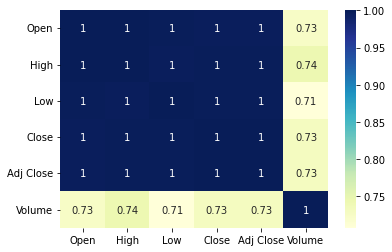

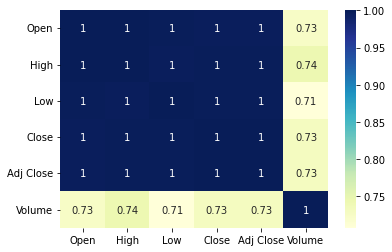

In [21]:
#Before to make our predicitons, we have to get the correlation between the values

correlation = df.corr()

import matplotlib.pyplot as plt
import seaborn as sns

figure = sns.heatmap(correlation, cmap = "YlGnBu",annot = True)

plt.show(figure)

The volume column has a low correlation with the other columns in comparison. But, the correlations are almost perfect betwenn prices columns (open, high, low and close). To continue our study, we'll focus our predictions in these columns.

To continue our study, let's define our prediction time, i decided to predict until the next 90 days (considering i made this study in 2021's may).

In [10]:
#Importing our machine learning library

from autots import AutoTS

model = AutoTS(forecast_length = 232, frequency = 'infer', ensemble = 'simple')
model = model.fit(df, date_col = 'Date', value_col = 'Close', id_col = None)

prediction = model.predict()
forecast = prediction.forecast


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Inferred frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 6 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
43/43 [==============================] - 12s 8ms/step - loss: 0.4181
Epoch 2/50
43/43 [==============================] - 0s 11ms/step - loss: 0.4174
Epoch 3/50
43/43 [==============================] - 0s 9ms/step - loss: 0.4170
Epoch 4/50
43/43 [==============================] - 0s 9ms/step - loss: 0.4155
Epoch 5/50
43/43 [==============================] - 0s 8ms/step - loss: 0.4115
Epoch 6/50
43/43 [==============================] - 0s 8ms/step - loss: 0.4071
Epoch 7/50
43/43 [==============================] - 0s 9ms/step - loss: 0.4031
Epoch 8/50
43/43 [==============================] - 0s 8ms/step - loss: 0.4024
Epoch 9/50
43/43 [==============================] - 0s 8ms/step - loss: 0.4015
Epoch 10/50
43/43 [==============================] - 0s 10ms/step - loss: 0.3988
Epoch 11/50
43/43 [==============================] - 0s 8ms/step - loss: 0.3953
Epoch 12/50
43/43 [==============================] - 0s 8m

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 42 with model AverageValueNaive in generation 0 of 10
Model Number: 43 with model GLS in generation 0 of 10
Model Number: 44 with model SeasonalNaive in generation 0 of 10
Model Number: 45 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 45: GLM
Model Number: 46 with model ETS in generation 0 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 47 with model FBProphet in generation 0 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 48 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 48: GluonTS
Model Number: 49 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 49: UnobservedComponents
Model Number: 50 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 50: VAR
Model Number: 51 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 51: VECM
Model Number: 52 with model WindowRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 52: WindowRegression
Model Number: 53 with model DatepartRegression in generation 0 of 10
Model Number: 54 with model MultivariateRegression in generation 0 of 10
Model

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 97 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 97: GluonTS
Model Number: 98 with model WindowRegression in generation 0 of 10
Template Eval Error: LightGBMError('[tweedie]: at least one target label is negative') in model 98: WindowRegression
Model Number: 99 with model FBProphet in generation 0 of 10
Model Number: 100 with model GLS in generation 0 of 10
Model Number: 101 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (232, 1), got (232,).') in model 101: UnobservedComponents
Model Number: 102 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 102: GluonTS
Model Number: 103 with model SeasonalNaive in generation 0 of 10
Model Num

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:57: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:58: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:58: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 111 with model MultivariateMotif in generation 0 of 10
Model Number: 112 with model DatepartRegression in generation 0 of 10
Epoch 1/100
18/18 [==============================] - 7s 64ms/step - loss: 6.8998 - val_loss: 9.0824
Epoch 2/100
18/18 [==============================] - 1s 33ms/step - loss: 6.2040 - val_loss: 9.0262
Epoch 3/100
18/18 [==============================] - 1s 30ms/step - loss: 6.1569 - val_loss: 9.0798
Epoch 4/100
18/18 [==============================] - 1s 32ms/step - loss: 6.2403 - val_loss: 9.1333
Epoch 5/100
18/18 [==============================] - 1s 32ms/step - loss: 6.2580 - val_loss: 9.0870
Epoch 6/100
18/18 [==============================] - 1s 33ms/step - loss: 6.2723 - val_loss: 9.0679
Epoch 7/100
18/18 [==============================] - 1s 33ms/step - loss: 6.1638 - val_loss: 9.0500
Epoch 8/100
18/18 [==============================] - 1s 32ms/step - loss: 6.1925 - val_loss: 9.0616
Epoch 9/100
18/18 [==============================] - 1s 34ms/

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 126 with model FBProphet in generation 0 of 10
Model Number: 127 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 127: VAR
Model Number: 128 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 128: GluonTS
Model Number: 129 with model MultivariateMotif in generation 0 of 10
Model Number: 130 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 130: Theta
Model Number: 131 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 131: VAR
Model Number: 132 with model NVAR in generation 0 of 10
Model Number: 133 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 133: Theta
Model 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 187 with model SectionalMotif in generation 1 of 10
Model Number: 188 with model SectionalMotif in generation 1 of 10
Model Number: 189 with model SectionalMotif in generation 1 of 10
Model Number: 190 with model SectionalMotif in generation 1 of 10
Model Number: 191 with model GLS in generation 1 of 10
Model Number: 192 with model GLS in generation 1 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 193 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 194 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 195 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 196 with model FBProphet in generation 1 of 10
Model Number: 197 with model GLM in generation 1 of 10
Model Number: 198 with model GLM in generation 1 of 10
Model Number: 199 with model GLM in generation 1 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 199: GLM
Model Number: 200 with model GLM in generation 1 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 200: GLM
Model Number: 201 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 201: GluonTS
Model Number: 202 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 202:

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide



Template Eval Error: ValueError('Only gave one variable to VAR') in model 208: VAR
Model Number: 209 with model VECM in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 209: VECM
Model Number: 210 with model VECM in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 210: VECM
Model Number: 211 with model VECM in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 211: VECM
Model Number: 212 with model VECM in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 212: VECM
Model Number: 213 with model Theta in generation 1 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 213: Theta
Model Number: 214 with model Theta in generation 1 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 214: Theta
Model Number: 215 w

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 222: DatepartRegression
Model Number: 223 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 223: DatepartRegression
Model Number: 224 with model LastValueNaive in generation 2 of 10
Model Number: 225 with model LastValueNaive in generation 2 of 10
Model Number: 226 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 227 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 228 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Template Eval Error: ValueError('Model ETS returned NaN for one or more series. fail_on_forecast_nan=Tr

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 273 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 274 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 275 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 276 with model FBProphet in generation 2 of 10
Model Number: 277 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 277: GluonTS
Model Number: 278 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 278: GluonTS
Model Number: 279 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 279: GluonTS
Model Number: 280 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 280: GluonTS
Model Number: 281 with model VAR in generation 2 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 281: VAR
Model Num

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.698e+06, tolerance: 2.384e+03



Model Number: 313 with model NVAR in generation 3 of 10
Model Number: 314 with model NVAR in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.635e+06, tolerance: 2.645e+03



Model Number: 315 with model NVAR in generation 3 of 10
Model Number: 316 with model SeasonalNaive in generation 3 of 10
Model Number: 317 with model SeasonalNaive in generation 3 of 10
Model Number: 318 with model SeasonalNaive in generation 3 of 10
Model Number: 319 with model SeasonalNaive in generation 3 of 10
Model Number: 320 with model MultivariateRegression in generation 3 of 10
Model Number: 321 with model MultivariateRegression in generation 3 of 10
Model Number: 322 with model MultivariateRegression in generation 3 of 10
Model Number: 323 with model MultivariateRegression in generation 3 of 10
Model Number: 324 with model UnivariateMotif in generation 3 of 10
Model Number: 325 with model UnivariateMotif in generation 3 of 10
Model Number: 326 with model UnivariateMotif in generation 3 of 10
Model Number: 327 with model UnivariateMotif in generation 3 of 10
Model Number: 328 with model MultivariateMotif in generation 3 of 10
Model Number: 329 with model MultivariateMotif in g

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 335 with model GLM in generation 3 of 10
Model Number: 336 with model ZeroesNaive in generation 3 of 10
Model Number: 337 with model ZeroesNaive in generation 3 of 10
Model Number: 338 with model ZeroesNaive in generation 3 of 10
Model Number: 339 with model WindowRegression in generation 3 of 10
Model Number: 340 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 340: WindowRegression
Model Number: 341 with model WindowRegression in generation 3 of 10
Model Number: 342 with model SectionalMotif in generation 3 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 342: SectionalMotif
Model Number: 343 with model SectionalMotif in generation 3 of 10
Model Number: 344 with model SectionalMotif in generation 3 of 10
Model Number: 345 with model SectionalMotif in generation 3 of 10
Template Eval Error: ValueError("regression_typ

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 349 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 350 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 351 with model FBProphet in generation 3 of 10
Model Number: 352 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 352: GluonTS
Model Number: 353 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 353: GluonTS
Model Number: 354 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 354: GluonTS
Model Number: 355 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 355: GluonTS
Model Number: 356 with model VAR in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 356: VAR
Model Num

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn

Model Number: 375 with model SeasonalNaive in generation 4 of 10
Model Number: 376 with model SeasonalNaive in generation 4 of 10
Model Number: 377 with model SeasonalNaive in generation 4 of 10
Model Number: 378 with model SeasonalNaive in generation 4 of 10
Model Number: 379 with model LastValueNaive in generation 4 of 10
Model Number: 380 with model LastValueNaive in generation 4 of 10
Model Number: 381 with model LastValueNaive in generation 4 of 10
Model Number: 382 with model UnobservedComponents in generation 4 of 10
Model Number: 383 with model UnobservedComponents in generation 4 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (232, 1), got (232,).') in model 383: UnobservedComponents
Model Number: 384 with model UnobservedComponents in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 384: UnobservedComponents
Model Number: 385 with model ETS in gen

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 397 with model MultivariateRegression in generation 4 of 10
Model Number: 398 with model MultivariateRegression in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 399 with model GLS in generation 4 of 10
Model Number: 400 with model GLS in generation 4 of 10
Model Number: 401 with model GLS in generation 4 of 10
Model Number: 402 with model UnivariateMotif in generation 4 of 10
Model Number: 403 with model UnivariateMotif in generation 4 of 10
Model Number: 404 with model UnivariateMotif in generation 4 of 10
Model Number: 405 with model UnivariateMotif in generation 4 of 10
Model Number: 406 with model GLM in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 407 with model GLM in generation 4 of 10
Model Number: 408 with model GLM in generation 4 of 10
Model Number: 409 with model GLM in generation 4 of 10
Model Number: 410 with model SectionalMotif in generation 4 of 10
Model Number: 411 with model SectionalMotif in generation 4 of 10
Model Number: 412 with model SectionalMotif in generation 4 of 10
Model Number: 413 with model SectionalMotif in generation 4 of 10
Model Number: 414 with model MultivariateMotif in generation 4 of 10
Model Number: 415 with model MultivariateMotif in generation 4 of 10
Model Number: 416 with model MultivariateMotif in generation 4 of 10
Model Number: 417 with model MultivariateMotif in generation 4 of 10
Model Number: 418 with model ZeroesNaive in generation 4 of 10
Model Number: 419 with model ZeroesNaive in generation 4 of 10
Model Number: 420 with model ZeroesNaive in generation 4 of 10
Model Number: 421 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError("regre

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 424 with model FBProphet in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 424: FBProphet
Model Number: 425 with model FBProphet in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 425: FBProphet
Model Number: 426 with model FBProphet in generation 4 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 427 with model FBProphet in generation 4 of 10
Model Number: 428 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 428: GluonTS
Model Number: 429 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 429: GluonTS
Model Number: 430 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 430: GluonTS
Model Number: 431 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 431: GluonTS
Model Number: 432 with model VAR in generation 4 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 432: VAR
Model Num

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    4.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 450 with model DatepartRegression in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn

Model Number: 451 with model SeasonalNaive in generation 5 of 10
Model Number: 452 with model SeasonalNaive in generation 5 of 10
Model Number: 453 with model SeasonalNaive in generation 5 of 10
Model Number: 454 with model LastValueNaive in generation 5 of 10
Model Number: 455 with model LastValueNaive in generation 5 of 10
Model Number: 456 with model LastValueNaive in generation 5 of 10
Model Number: 457 with model UnobservedComponents in generation 5 of 10
Model Number: 458 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (232, 1), got (232,).') in model 458: UnobservedComponents
Model Number: 459 with model UnobservedComponents in generation 5 of 10
Model Number: 460 with model ETS in generation 5 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('endog must be strictly positive when using multiplicat

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 482 with model GLM in generation 5 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 482: GLM
Model Number: 483 with model GLM in generation 5 of 10
Model Number: 484 with model GLM in generation 5 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 484: GLM
Model Number: 485 with model MultivariateMotif in generation 5 of 10
Model Number: 486 with model MultivariateMotif in generation 5 of 10
Model Number: 487 with model MultivariateMotif in generation 5 of 10
Model Number: 488 with model MultivariateMotif in generation 5 of 10
Model Number: 489 with model SectionalMotif in generation 5 of 10
Model Number: 490 with model SectionalMotif in generation 5 of 10
Model Num

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 499 with model FBProphet in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 499: FBProphet
Model Number: 500 with model FBProphet in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 500: FBProphet
Model Number: 501 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 502 with model FBProphet in generation 5 of 10
Model Number: 503 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 503: GluonTS
Model Number: 504 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 504: GluonTS
Model Number: 505 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 505: GluonTS
Model Number: 506 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 506: GluonTS
Model Number: 507 with model VAR in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 507: VAR
Model Num

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 527: DatepartRegression
Model Number: 528 with model DatepartRegression in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.890e+00, tolerance: 1.143e-02



Model Number: 529 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 529: DatepartRegression
Model Number: 530 with model LastValueNaive in generation 6 of 10
Model Number: 531 with model LastValueNaive in generation 6 of 10
Model Number: 532 with model LastValueNaive in generation 6 of 10
Model Number: 533 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (232, 1), got (232,).') in model 533: UnobservedComponents
Model Number: 534 with model UnobservedComponents in generation 6 of 10
Model Number: 535 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 535: UnobservedComponents
Model Number: 536 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected ke

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 576 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 577 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 578 with model FBProphet in generation 6 of 10
Model Number: 579 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 579: GluonTS
Model Number: 580 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 580: GluonTS
Model Number: 581 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 581: GluonTS
Model Number: 582 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 582: GluonTS
Model Number: 583 with model VAR in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 583: VAR
Model Num

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn

Model Number: 609 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (232, 1), got (232,).') in model 609: UnobservedComponents
Model Number: 610 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 610: UnobservedComponents
Model Number: 611 with model UnobservedComponents in generation 7 of 10
Model Number: 612 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 613 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('endog must be strictly positive when using multiplicative trend or season

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 636 with model SectionalMotif in generation 7 of 10
Model Number: 637 with model SectionalMotif in generation 7 of 10
Model Number: 638 with model SectionalMotif in generation 7 of 10
Model Number: 639 with model SectionalMotif in generation 7 of 10
Model Number: 640 with model MultivariateMotif in generation 7 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'PowerTransformer', '1': 'Slice', '2': 'SeasonalDifference', '3': 'Detrend', '4': 'ClipOutliers'}, 'transformation_params': {'0': {}, '1': {'method': 0.5}, '2': {'lag_1': 12, 'method': 'Median'}, '3': {'model': 'Linear', 'phi': 1, 'window': None}, '4': {'method': 'clip', 'std_threshold': 5, 'fillna': None}}}. fail_on_forecast_nan=True") in model 640: MultivariateMotif
Model Number: 641 with model MultivariateMotif in generation 7 of 10
Model Number: 642 with model MultivariateMotif in generation 7 of 10
Model Number: 643 with mod

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 648 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 649 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 650 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 651 with model FBProphet in generation 7 of 10
Model Number: 652 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 652: GluonTS
Model Number: 653 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 653: GluonTS
Model Number: 654 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 654: GluonTS
Model Number: 655 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 655: GluonTS
Model Number: 656 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 656: VAR
Model Num

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 694 with model MultivariateRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 694: MultivariateRegression
Model Number: 695 with model MultivariateRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 695: MultivariateRegression
Model Number: 696 with model NVAR in generation 8 of 10
Model Number: 697 with model NVAR in generation 8 of 10
Model Number: 698 with model NVAR in generation 8 of 10
Model Number: 699 with model NVAR in generation 8 of 10
Model Number: 700 with model GLM in generation 8 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 700: GLM
Model Number: 701 with model GLM in generation 8 of 10
Template Eval Error: TypeError("ufunc 'isfinite' 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.246e+06, tolerance: 2.610e+03



Model Number: 705 with model UnivariateMotif in generation 8 of 10
Model Number: 706 with model UnivariateMotif in generation 8 of 10
Model Number: 707 with model UnivariateMotif in generation 8 of 10
Model Number: 708 with model UnivariateMotif in generation 8 of 10
Model Number: 709 with model MultivariateMotif in generation 8 of 10
Model Number: 710 with model MultivariateMotif in generation 8 of 10
Model Number: 711 with model MultivariateMotif in generation 8 of 10
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 711: MultivariateMotif
Model Number: 712 with model MultivariateMotif in generation 8 of 10
Model Number: 713 with model SectionalMotif in generation 8 of 10
Model Number: 714 with model SectionalMotif in generation 8 of 10
Model Number: 715 with model SectionalMotif in generation 8 of 10
Model Number: 716 with model SectionalMotif in generation 8 of 10
Model Number: 717 with model WindowReg

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.486e+06, tolerance: 2.710e+03

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.486e+06, tolerance: 2.710e+03



Model Number: 722 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 723 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 724 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 725 with model FBProphet in generation 8 of 10
Model Number: 726 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 726: GluonTS
Model Number: 727 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 727: GluonTS
Model Number: 728 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 728: GluonTS
Model Number: 729 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 729: GluonTS
Model Number: 730 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 730: VAR
Model Num

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 754 with model DatepartRegression in generation 9 of 10
Template Eval Error: ValueError('Failed to convert a NumPy array to a Tensor (Unsupported object type int).') in model 754: DatepartRegression
Model Number: 755 with model ETS in generation 9 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 756 with model ETS in generation 9 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 757 with model ETS in generation 9 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 758 with model ETS in generation 9 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 759 with model AverageValueNaive in generation 9 of 10
Model Number: 760 with model AverageValueNaive in generation 9 of 10
Model Number: 761 with model AverageValueNaive in generation 9 of 10
Model Number: 762 with m

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:521: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:1163: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 774 with model GLS in generation 9 of 10
Model Number: 775 with model GLS in generation 9 of 10
Model Number: 776 with model GLS in generation 9 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 777 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 778 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 779 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 780 with model FBProphet in generation 9 of 10
Model Number: 781 with model UnivariateMotif in generation 9 of 10
Model Number: 782 with model UnivariateMotif in generation 9 of 10
Model Number: 783 with model UnivariateMotif in generation 9 of 10
Model Number: 784 with model UnivariateMotif in generation 9 of 10
Model Number: 785 with model MultivariateMotif in generation 9 of 10
Model Number: 786 with model MultivariateMotif in generation 9 of 10
Model Number: 787 with model MultivariateMotif in generation 9 of 10
Model Number: 788 with model MultivariateMotif in generation 9 of 10
Model Number: 789 with model SectionalMotif in generation 9 of 10
Model Number: 790 with model SectionalMotif in generation 9 of 10
Model Number: 791 with model SectionalMotif in generation 9 of 10
Model Number: 792 with model SectionalMotif in generation 9 of 10
Model Number: 793 with model WindowRegression in generation 9 of 10
Model Number: 794 with model WindowRegression in generation 9 o

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 847 with model GLM in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 848 with model GLM in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 849 with model GLM in generation 10 of 10
Model Number: 850 with model ZeroesNaive in generation 10 of 10
Model Number: 851 with model ZeroesNaive in generation 10 of 10
Model Number: 852 with model ZeroesNaive in generation 10 of 10
Model Number: 853 with model WindowRegression in generation 10 of 10
Model Number: 854 with model WindowRegression in generation 10 of 10
Epoch 1/50
84/84 [==============================] - 9s 35ms/step - loss: 2.6030
Epoch 2/50
84/84 [==============================] - 3s 36ms/step - loss: 2.5949
Epoch 3/50
84/84 [==============================] - 3s 36ms/step - loss: 2.5935
Epoch 4/50
84/84 [==============================] - 3s 36ms/step - loss: 2.5895
Epoch 5/50
84/84 [==============================] - 3s 36ms/step - loss: 2.5881
Epoch 6/50
84/84 [==============================] - 3s 35ms/step - loss: 2.5845
Epoch 7/50
84/84 [==============================] - 3s 35ms/step - loss: 2.5810
Epoch 8/50
84/84 [==============================] - 3s

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 857 with model FBProphet in generation 10 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 858 with model FBProphet in generation 10 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 859 with model FBProphet in generation 10 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 860 with model FBProphet in generation 10 of 10
Model Number: 861 with model UnivariateMotif in generation 10 of 10
Model Number: 862 with model UnivariateMotif in generation 10 of 10
Model Number: 863 with model UnivariateMotif in generation 10 of 10
Model Number: 864 with model UnivariateMotif in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.515e+06, tolerance: 2.441e+03

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.216e+06, tolerance: 2.604e+03



Model Number: 865 with model MultivariateMotif in generation 10 of 10
Model Number: 866 with model MultivariateMotif in generation 10 of 10
Model Number: 867 with model MultivariateMotif in generation 10 of 10
Model Number: 868 with model MultivariateMotif in generation 10 of 10
Model Number: 869 with model SectionalMotif in generation 10 of 10
Model Number: 870 with model SectionalMotif in generation 10 of 10
Model Number: 871 with model SectionalMotif in generation 10 of 10
Model Number: 872 with model SectionalMotif in generation 10 of 10
Model Number: 873 with model Ensemble in generation 11 of 0
Model Number: 874 with model Ensemble in generation 11 of 0
Model Number: 875 with model Ensemble in generation 11 of 0


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 876 with model Ensemble in generation 11 of 0


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 877 with model Ensemble in generation 11 of 0
Model Number: 878 with model Ensemble in generation 11 of 0
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 879 with model Ensemble in generation 11 of 0
Model Number: 880 with model Ensemble in generation 11 of 0
Validation Round: 1
Model Number: 1 of 132 with model Ensemble for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
1 - Ensemble with avg smape 158.04: 
Model Number: 2 of 132 with model Ensemble for Validation 1
2 - Ensemble with avg smape 158.08: 
Model Number: 3 of 132 with model Ensemble for Validation 1
3 - Ensemble with avg smape 158.08: 
Model Number: 4 of 132 with model Ensemble for Validation 1
4 - Ensemble with avg smape 158.08: 
Model Number: 5 of 132 with model LastValueNaive for Validation 1
5 - LastValueNaive with avg smape 157.96: 
Model Number: 6 of 132 with model Ensemble for Validation 1
6 - Ensemble wi

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



9 - Ensemble with avg smape 150.31: 
Model Number: 10 of 132 with model UnobservedComponents for Validation 1
10 - UnobservedComponents with avg smape 158.26: 
Model Number: 11 of 132 with model SeasonalNaive for Validation 1
11 - SeasonalNaive with avg smape 158.02: 
Model Number: 12 of 132 with model SeasonalNaive for Validation 1
12 - SeasonalNaive with avg smape 162.34: 
Model Number: 13 of 132 with model SeasonalNaive for Validation 1
13 - SeasonalNaive with avg smape 158.05: 
Model Number: 14 of 132 with model SeasonalNaive for Validation 1
14 - SeasonalNaive with avg smape 157.99: 
Model Number: 15 of 132 with model SeasonalNaive for Validation 1
15 - SeasonalNaive with avg smape 158.03: 
Model Number: 16 of 132 with model SeasonalNaive for Validation 1
16 - SeasonalNaive with avg smape 159.39: 
Model Number: 17 of 132 with model SeasonalNaive for Validation 1
17 - SeasonalNaive with avg smape 158.06: 
Model Number: 18 of 132 with model SeasonalNaive for Validation 1
18 - Season

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



43 - GLM with avg smape 158.02: 
Model Number: 44 of 132 with model AverageValueNaive for Validation 1
44 - AverageValueNaive with avg smape 162.71: 
Model Number: 45 of 132 with model AverageValueNaive for Validation 1
45 - AverageValueNaive with avg smape 164.15: 
Model Number: 46 of 132 with model ZeroesNaive for Validation 1
46 - ZeroesNaive with avg smape 158.02: 
Model Number: 47 of 132 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
47 - ETS with avg smape 141.1: 
Model Number: 48 of 132 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
48 - ETS with avg smape 149.49: 
Model Number: 49 of 132 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('Can only dampen the trend component')
49 - ETS with avg smape 149.61: 
Model Number: 50 of 132 with model 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


59 - UnobservedComponents with avg smape 147.0: 
Model Number: 60 of 132 with model FBProphet for Validation 1
60 - FBProphet with avg smape 140.04: 
Model Number: 61 of 132 with model AverageValueNaive for Validation 1
61 - AverageValueNaive with avg smape 164.28: 
Model Number: 62 of 132 with model GLS for Validation 1
62 - GLS with avg smape 161.36: 
Model Number: 63 of 132 with model GLS for Validation 1
63 - GLS with avg smape 161.52: 
Model Number: 64 of 132 with model MultivariateRegression for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


64 - MultivariateRegression with avg smape 140.63: 
Model Number: 65 of 132 with model FBProphet for Validation 1
65 - FBProphet with avg smape 158.02: 
Model Number: 66 of 132 with model UnivariateMotif for Validation 1
66 - UnivariateMotif with avg smape 149.81: 
Model Number: 67 of 132 with model MultivariateRegression for Validation 1
67 - MultivariateRegression with avg smape 152.05: 
Model Number: 68 of 132 with model MultivariateRegression for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


68 - MultivariateRegression with avg smape 161.44: 
Model Number: 69 of 132 with model FBProphet for Validation 1
69 - FBProphet with avg smape 158.02: 
Model Number: 70 of 132 with model GLM for Validation 1
70 - GLM with avg smape 160.66: 
Model Number: 71 of 132 with model MultivariateRegression for Validation 1
71 - MultivariateRegression with avg smape 151.12: 
Model Number: 72 of 132 with model WindowRegression for Validation 1
72 - WindowRegression with avg smape 127.48: 
Model Number: 73 of 132 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


73 - DatepartRegression with avg smape 151.29: 
Model Number: 74 of 132 with model UnivariateMotif for Validation 1
74 - UnivariateMotif with avg smape 155.73: 
Model Number: 75 of 132 with model MultivariateMotif for Validation 1
75 - MultivariateMotif with avg smape 129.26: 
Model Number: 76 of 132 with model UnivariateMotif for Validation 1
76 - UnivariateMotif with avg smape 151.68: 
Model Number: 77 of 132 with model MultivariateMotif for Validation 1
77 - MultivariateMotif with avg smape 127.71: 
Model Number: 78 of 132 with model MultivariateMotif for Validation 1
78 - MultivariateMotif with avg smape 127.71: 
Model Number: 79 of 132 with model SectionalMotif for Validation 1
79 - SectionalMotif with avg smape 150.58: 
Model Number: 80 of 132 with model SectionalMotif for Validation 1
80 - SectionalMotif with avg smape 150.56: 
Model Number: 81 of 132 with model MultivariateMotif for Validation 1
81 - MultivariateMotif with avg smape 128.1: 
Model Number: 82 of 132 with model Mu

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



121 - Ensemble with avg smape 160.18: 
Model Number: 122 of 132 with model ZeroesNaive for Validation 1
122 - ZeroesNaive with avg smape 131.52: 
Model Number: 123 of 132 with model SectionalMotif for Validation 1
123 - SectionalMotif with avg smape 120.5: 
Model Number: 124 of 132 with model DatepartRegression for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


124 - DatepartRegression with avg smape 165.68: 
Model Number: 125 of 132 with model FBProphet for Validation 1
125 - FBProphet with avg smape 136.42: 
Model Number: 126 of 132 with model GLS for Validation 1
126 - GLS with avg smape 166.09: 
Model Number: 127 of 132 with model GLS for Validation 1
127 - GLS with avg smape 166.04: 
Model Number: 128 of 132 with model GLS for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


128 - GLS with avg smape 166.11: 
Model Number: 129 of 132 with model FBProphet for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


129 - FBProphet with avg smape 132.97: 
Model Number: 130 of 132 with model FBProphet for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


130 - FBProphet with avg smape 132.83: 
Model Number: 131 of 132 with model FBProphet for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


131 - FBProphet with avg smape 132.86: 
Model Number: 132 of 132 with model FBProphet for Validation 1
132 - FBProphet with avg smape 133.86: 
Validation Round: 2
Model Number: 1 of 132 with model Ensemble for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
1 - Ensemble with avg smape 48.19: 
Model Number: 2 of 132 with model Ensemble for Validation 2
2 - Ensemble with avg smape 47.68: 
Model Number: 3 of 132 with model Ensemble for Validation 2
3 - Ensemble with avg smape 47.66: 
Model Number: 4 of 132 with model Ensemble for Validation 2
4 - Ensemble with avg smape 47.66: 
Model Number: 5 of 132 with model LastValueNaive for Validation 2
5 - LastValueNaive with avg smape 46.57: 
Model Number: 6 of 132 with model Ensemble for Validation 2
6 - Ensemble with avg smape 46.58: 
Model Number: 7 of 132 with model LastValueNaive for Validation 2
7 - LastValueNaive with avg smape 45.92: 
Model Number: 8 of 132 with model Ensemble for Validation

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



9 - Ensemble with avg smape 45.99: 
Model Number: 10 of 132 with model UnobservedComponents for Validation 2
10 - UnobservedComponents with avg smape 50.55: 
Model Number: 11 of 132 with model SeasonalNaive for Validation 2
11 - SeasonalNaive with avg smape 45.92: 
Model Number: 12 of 132 with model SeasonalNaive for Validation 2
12 - SeasonalNaive with avg smape 49.32: 
Model Number: 13 of 132 with model SeasonalNaive for Validation 2
13 - SeasonalNaive with avg smape 45.71: 
Model Number: 14 of 132 with model SeasonalNaive for Validation 2
14 - SeasonalNaive with avg smape 46.35: 
Model Number: 15 of 132 with model SeasonalNaive for Validation 2
15 - SeasonalNaive with avg smape 46.18: 
Model Number: 16 of 132 with model SeasonalNaive for Validation 2
16 - SeasonalNaive with avg smape 46.68: 
Model Number: 17 of 132 with model SeasonalNaive for Validation 2
17 - SeasonalNaive with avg smape 46.0: 
Model Number: 18 of 132 with model SeasonalNaive for Validation 2
18 - SeasonalNaive wi

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



43 - GLM with avg smape 45.92: 
Model Number: 44 of 132 with model AverageValueNaive for Validation 2
44 - AverageValueNaive with avg smape 47.02: 
Model Number: 45 of 132 with model AverageValueNaive for Validation 2
45 - AverageValueNaive with avg smape 48.9: 
Model Number: 46 of 132 with model ZeroesNaive for Validation 2
46 - ZeroesNaive with avg smape 45.92: 
Model Number: 47 of 132 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
47 - ETS with avg smape 41.69: 
Model Number: 48 of 132 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
48 - ETS with avg smape 45.79: 
Model Number: 49 of 132 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('Can only dampen the trend component')
49 - ETS with avg smape 46.34: 
Model Number: 50 of 132 with model ETS for

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


59 - UnobservedComponents with avg smape 47.15: 
Model Number: 60 of 132 with model FBProphet for Validation 2
60 - FBProphet with avg smape 146.37: 
Model Number: 61 of 132 with model AverageValueNaive for Validation 2
61 - AverageValueNaive with avg smape 47.46: 
Model Number: 62 of 132 with model GLS for Validation 2
62 - GLS with avg smape 54.37: 
Model Number: 63 of 132 with model GLS for Validation 2
63 - GLS with avg smape 54.39: 
Model Number: 64 of 132 with model MultivariateRegression for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


64 - MultivariateRegression with avg smape 47.4: 
Model Number: 65 of 132 with model FBProphet for Validation 2
65 - FBProphet with avg smape 94.22: 
Model Number: 66 of 132 with model UnivariateMotif for Validation 2
66 - UnivariateMotif with avg smape 47.98: 
Model Number: 67 of 132 with model MultivariateRegression for Validation 2
67 - MultivariateRegression with avg smape 43.19: 
Model Number: 68 of 132 with model MultivariateRegression for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


68 - MultivariateRegression with avg smape 51.25: 
Model Number: 69 of 132 with model FBProphet for Validation 2
69 - FBProphet with avg smape 93.96: 
Model Number: 70 of 132 with model GLM for Validation 2
70 - GLM with avg smape 54.23: 
Model Number: 71 of 132 with model MultivariateRegression for Validation 2
71 - MultivariateRegression with avg smape 50.5: 
Model Number: 72 of 132 with model WindowRegression for Validation 2
72 - WindowRegression with avg smape 39.21: 
Model Number: 73 of 132 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


73 - DatepartRegression with avg smape 47.58: 
Model Number: 74 of 132 with model UnivariateMotif for Validation 2
74 - UnivariateMotif with avg smape 31.8: 
Model Number: 75 of 132 with model MultivariateMotif for Validation 2
75 - MultivariateMotif with avg smape 44.34: 
Model Number: 76 of 132 with model UnivariateMotif for Validation 2
76 - UnivariateMotif with avg smape 60.77: 
Model Number: 77 of 132 with model MultivariateMotif for Validation 2
77 - MultivariateMotif with avg smape 44.73: 
Model Number: 78 of 132 with model MultivariateMotif for Validation 2
78 - MultivariateMotif with avg smape 44.73: 
Model Number: 79 of 132 with model SectionalMotif for Validation 2
79 - SectionalMotif with avg smape 54.48: 
Model Number: 80 of 132 with model SectionalMotif for Validation 2
80 - SectionalMotif with avg smape 50.42: 
Model Number: 81 of 132 with model MultivariateMotif for Validation 2
81 - MultivariateMotif with avg smape 41.83: 
Model Number: 82 of 132 with model Multivariat

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.199e+00, tolerance: 7.517e-03



105 - DatepartRegression with avg smape 26.35: 
Model Number: 106 of 132 with model WindowRegression for Validation 2
Epoch 1/50
55/55 [==============================] - 8s 36ms/step - loss: 0.4234
Epoch 2/50
55/55 [==============================] - 2s 37ms/step - loss: 0.4224
Epoch 3/50
55/55 [==============================] - 2s 38ms/step - loss: 0.4224
Epoch 4/50
55/55 [==============================] - 2s 37ms/step - loss: 0.4216
Epoch 5/50
55/55 [==============================] - 2s 36ms/step - loss: 0.4212
Epoch 6/50
55/55 [==============================] - 2s 37ms/step - loss: 0.4211
Epoch 7/50
55/55 [==============================] - 2s 36ms/step - loss: 0.4209
Epoch 8/50
55/55 [==============================] - 2s 36ms/step - loss: 0.4217
Epoch 9/50
55/55 [==============================] - 2s 37ms/step - loss: 0.4214
Epoch 10/50
55/55 [==============================] - 2s 36ms/step - loss: 0.4217
Epoch 11/50
55/55 [==============================] - 2s 36ms/step - loss: 0.4203


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



121 - Ensemble with avg smape 31.17: 
Model Number: 122 of 132 with model ZeroesNaive for Validation 2
122 - ZeroesNaive with avg smape 49.12: 
Model Number: 123 of 132 with model SectionalMotif for Validation 2
123 - SectionalMotif with avg smape 71.97: 
Model Number: 124 of 132 with model DatepartRegression for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


124 - DatepartRegression with avg smape 50.44: 
Model Number: 125 of 132 with model FBProphet for Validation 2
125 - FBProphet with avg smape 171.86: 
Model Number: 126 of 132 with model GLS for Validation 2
126 - GLS with avg smape 26.81: 
Model Number: 127 of 132 with model GLS for Validation 2
127 - GLS with avg smape 26.91: 
Model Number: 128 of 132 with model GLS for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


128 - GLS with avg smape 26.91: 
Model Number: 129 of 132 with model FBProphet for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


129 - FBProphet with avg smape 157.27: 
Model Number: 130 of 132 with model FBProphet for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


130 - FBProphet with avg smape 151.58: 
Model Number: 131 of 132 with model FBProphet for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


131 - FBProphet with avg smape 157.12: 
Model Number: 132 of 132 with model FBProphet for Validation 2
132 - FBProphet with avg smape 132.46: 
Inferred frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 6 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
43/43 [==============================] - 12s 10ms/step - loss: 0.4181
Epoch 2/50
43/43 [==============================] - 0s 9ms/step - loss: 0.4174
Epoch 3/50
43/43 [==============================] - 0s 10ms/step - loss: 0.4170
Epoch 4/50
43/43 [==============================] - 0s 8ms/step - loss: 0.4155
Epoch 5/50
43/43 [==============================] - 0s 8ms/step - loss: 0.4115
Epoch 6/50
43/43 [==============================] - 0s 9ms/step - loss: 0.4071
Epoch 7/50
43/43 [==============================] - 0s 9ms/step - loss: 0.4031
Epoch 8/50
43/43 [==============================] - 0s 11ms/step - loss: 0.4024
Epoch 9/50
43/43 [==============================] - 0s 10ms/step - loss: 0.4015
Epoch 10/50
43/43 [==============================] - 0s 11ms/step - loss: 0.3988
Epoch 11/50
43/43 [==============================] - 0s 9ms/step - loss: 0.3953
Epoch 12/50
43/43 [==============================] - 0s

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 42 with model AverageValueNaive in generation 0 of 10
Model Number: 43 with model GLS in generation 0 of 10
Model Number: 44 with model SeasonalNaive in generation 0 of 10
Model Number: 45 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 45: GLM
Model Number: 46 with model ETS in generation 0 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 47 with model FBProphet in generation 0 of 10
Model Number: 48 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 48: GluonTS
Model Number: 49 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 49: UnobservedComponents
Model Number: 50 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 50: VAR
Model Number: 51 with model VECM in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 51: VECM
Model Number: 52 with model WindowRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 52: WindowRegression
Model Number: 53 with model DatepartRegression in generation 0

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 97 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 97: GluonTS
Model Number: 98 with model WindowRegression in generation 0 of 10
Template Eval Error: LightGBMError('[tweedie]: at least one target label is negative') in model 98: WindowRegression
Model Number: 99 with model FBProphet in generation 0 of 10
Model Number: 100 with model GLS in generation 0 of 10
Model Number: 101 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (232, 1), got (232,).') in model 101: UnobservedComponents
Model Number: 102 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 102: GluonTS
Model Number: 103 with model SeasonalNaive in generation 0 of 10
Model Num

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:57: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:58: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:58: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 111 with model MultivariateMotif in generation 0 of 10
Model Number: 112 with model DatepartRegression in generation 0 of 10
Epoch 1/100
18/18 [==============================] - 8s 69ms/step - loss: 6.8998 - val_loss: 9.0824
Epoch 2/100
18/18 [==============================] - 1s 34ms/step - loss: 6.2040 - val_loss: 9.0262
Epoch 3/100
18/18 [==============================] - 1s 37ms/step - loss: 6.1569 - val_loss: 9.0798
Epoch 4/100
18/18 [==============================] - 1s 37ms/step - loss: 6.2403 - val_loss: 9.1333
Epoch 5/100
18/18 [==============================] - 1s 36ms/step - loss: 6.2580 - val_loss: 9.0870
Epoch 6/100
18/18 [==============================] - 1s 35ms/step - loss: 6.2723 - val_loss: 9.0679
Epoch 7/100
18/18 [==============================] - 1s 34ms/step - loss: 6.1638 - val_loss: 9.0500
Epoch 8/100
18/18 [==============================] - 1s 35ms/step - loss: 6.1925 - val_loss: 9.0616
Epoch 9/100
18/18 [==============================] - 1s 34ms/

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 126 with model FBProphet in generation 0 of 10
Model Number: 127 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 127: VAR
Model Number: 128 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 128: GluonTS
Model Number: 129 with model MultivariateMotif in generation 0 of 10
Model Number: 130 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 130: Theta
Model Number: 131 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 131: VAR
Model Number: 132 with model NVAR in generation 0 of 10
Model Number: 133 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 133: Theta
Model 

Now, it's time to plot our results

In [ ]:
forecast['Date'] = forecast.index #passing the index date to a Date column

import plotly.express as px

fig = px.line(forecast, x = "Date", y = "Close", title = 'BNB close price forecast until the end of year') #plotting our forecast

gitly.show(fig)

In [ ]:
# now, let's see BNB percentile of variation

x1 = forecast['Close'].min()
x2 = forecast['Close'].max()

x = ((x2/x1)-1)*100

print(x,"%")

Wich means from now until the peak (around final of september/october of december), the BNB tends to variate closer to 67%.(too good, isn't it)?


#**Conclusions**

The BNB coin is the most valuable coins in cryptomarket today. Unfortunately, some events that happens today made all of cryptocurrencies drops, and with the characteristic volatility of the market, your price goes down. 

As we see with the forecast, despite some actual events, the BNB price tends to increase during the days, what makes new and old investors became bullish (some crypto slang when you bet in some cryptocurrent increase).